# Exploring and Visualizing Data: Heat Map
In this exercise, we will create a heat map. A heat map combines a scatter plot with a histogram. It shades each pixel based on its density. Businesses often use heat maps in various forms of analytics. A common use case is to show user behavior on specific web pages or in applications.

Using the NYC taxi data again, we will create a heat map of drop-off latitude and longitude.

This exercise has two parts.
1. Create a demo heat map using the train data.
2. Create a heat map that focuses on where 90% of drop-offs occur.

In this exercise, you will use the following elements. For more information about these elements, see the **Python Documentation** section at the end of the exercise.
* `Canvas` class 
* `shade` method
* `percentile` method
* `np.percentile`
* `pd.DataFrame.where`

## Part 1: Create the Demo Heat Map
Run the following cell to create the heat map. The resulting heat map will show taxi drop-off locations; the brighter the area on the map, the more passengers were dropped off in that location. 


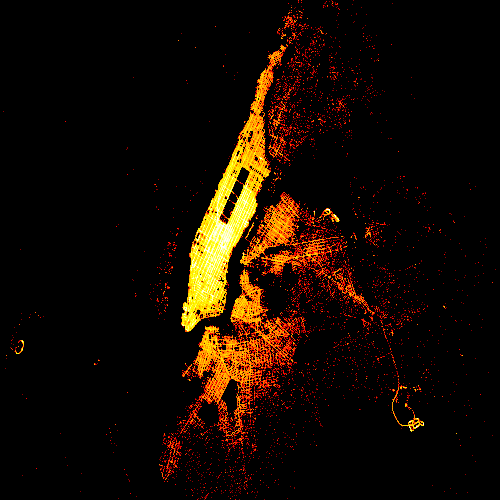

In [2]:
# datashader allows us to handle data with many rows, like NYC Taxi.
# it uses bokeh for plotting functionality.
import datashader as ds
from datashader.colors import Hot
from datashader import transfer_functions as tf
import numpy as np
import pandas as pd

# Load the data. 
df = pd.read_csv('train.csv')

plot_height, plot_width = int(500), int(500)

# Use the range we found earlier.
x_range, y_range = ((-74.2,-73.7), (40.6, 40.9)) 

# This is analogous to plt.figure; it represents the frame for a picture.
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range) 

# This plots dropoff latitude and longitude, and counts the number of points in each pixel.
# Notice we don't graph a sample, but the whole dataset; that's the power of datashader.
agg = cvs.points(df, 'dropoff_longitude', 'dropoff_latitude',  ds.count('passenger_count')) 

# This takes the counts from each pixel given by agg and shades them accordingly.
# set_background controls the background color.
# how controls the transition to different colors based on intensity of each pixel.
tf.set_background(tf.shade(agg, cmap=Hot, how='eq_hist'),"black")

## Part 2: Create the Drop-off Heat Map

To create a heat map that shows where more than 90% of drop-offs occur, follow these steps.

1. In the following code cell, add the call to `agg.where` to show drop-offs that are in the 90th or greater percentile. To do this, replace the `tf.set_background(tf.shade(agg.where(),` line in the code cell with your own code.

   **Note**: To see the code that we used, see **Answer Code** below the code cell.


2. Run the code cell.

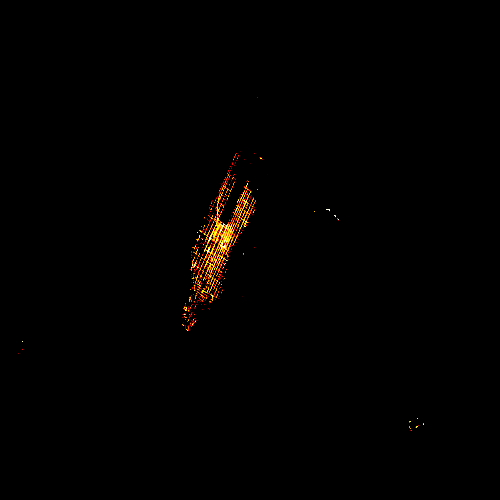

In [6]:
# datashader allows us to handle data with many rows, like NYC Taxi
# it uses bokeh for plotting functionality
import datashader as ds
from datashader.colors import Hot
from datashader import transfer_functions as tf
import numpy as np
import pandas as pd

# load NYC Taxi train data 
df = pd.read_csv('train.csv')

plot_height, plot_width = int(500), int(500)

x_range, y_range = ((-74.2,-73.7), (40.6, 40.9)) 

# sets up frame for plot, analogous to plt.figure
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range) 

# plots dropoff lat/long and sums passenger_count for all points in each pixel
agg = cvs.points(df, 'dropoff_longitude', 'dropoff_latitude',  ds.count('passenger_count')) 

#-----------------Your code here------------------------------#

# fill in the call to agg.where to show 90th percentile or greater dropoffs
tf.set_background(tf.shade(agg.where(agg>np.percentile(agg,99)), 
                  cmap=Hot, how='eq_hist'),"black")

#-------------------------------------------------------------#

### Answer code
We used the following code in the cell above. Note the parameter for `agg.where()`.

```python
#-----------------Your code here------------------------------#

# fill in the call to agg.where to show 90th percentile or greater dropoffs
tf.set_background(tf.shade(agg.where(agg>np.percentile(agg,90)), 
                  cmap=Hot, how='eq_hist'),"black")

#-------------------------------------------------------------#
```

## Thinking Ahead

Eventually, we will work on predicting trip duration based on pickup coordinates. This could be tackled many different ways, but the simplest is to fit a linear model to pickup coordinates and trip duration information. We'll learn more about this next week. 

For more information about linear models, see the following website.

- https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

## Privacy

When the NYC Taxi and Limousine Commission or Stack Overflow release their data, they assume they're not harming their customers who provided that data. This isn't always safe to assume due to re-identification. For more information, see the following website.

- https://www.georgetownlawtechreview.org/re-identification-of-anonymized-data/GLTR-04-2017/

## Python Documentation
Run the following cell to access documentation for the `Canvas` class.

In [2]:
import datashader as ds
from datashader import transfer_functions as tf
?ds.Canvas

Run the following cell to access documentation for the `shade` method.

In [3]:
?tf.shade

Run the following cell to access documentation for the `percentile` method.

In [5]:
?np.where